# Clustering - Crime data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.rename(columns={'Unnamed: 0':'state'},inplace=True)
data

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
data.isna().sum()

state       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

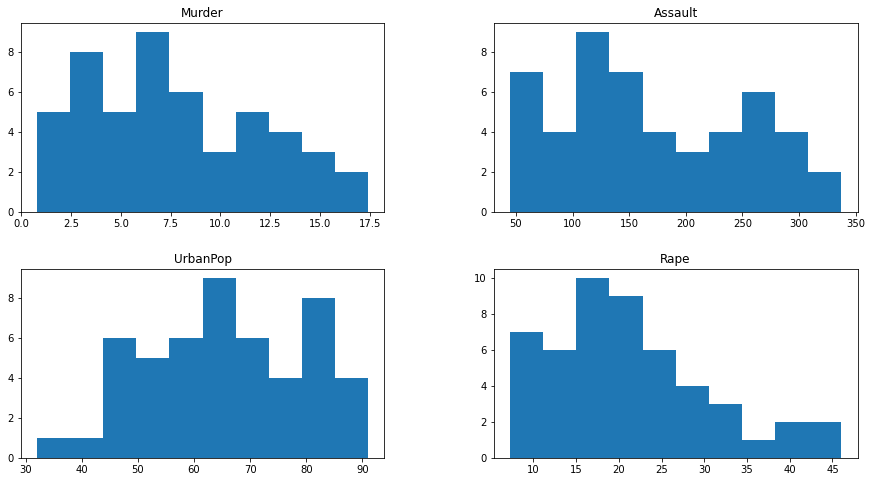

In [7]:
data.hist(figsize=(15,8),grid=False)

### Normalization function 

In [8]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
df_norm = norm_func(data.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Heirarchical Clustering

In [10]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

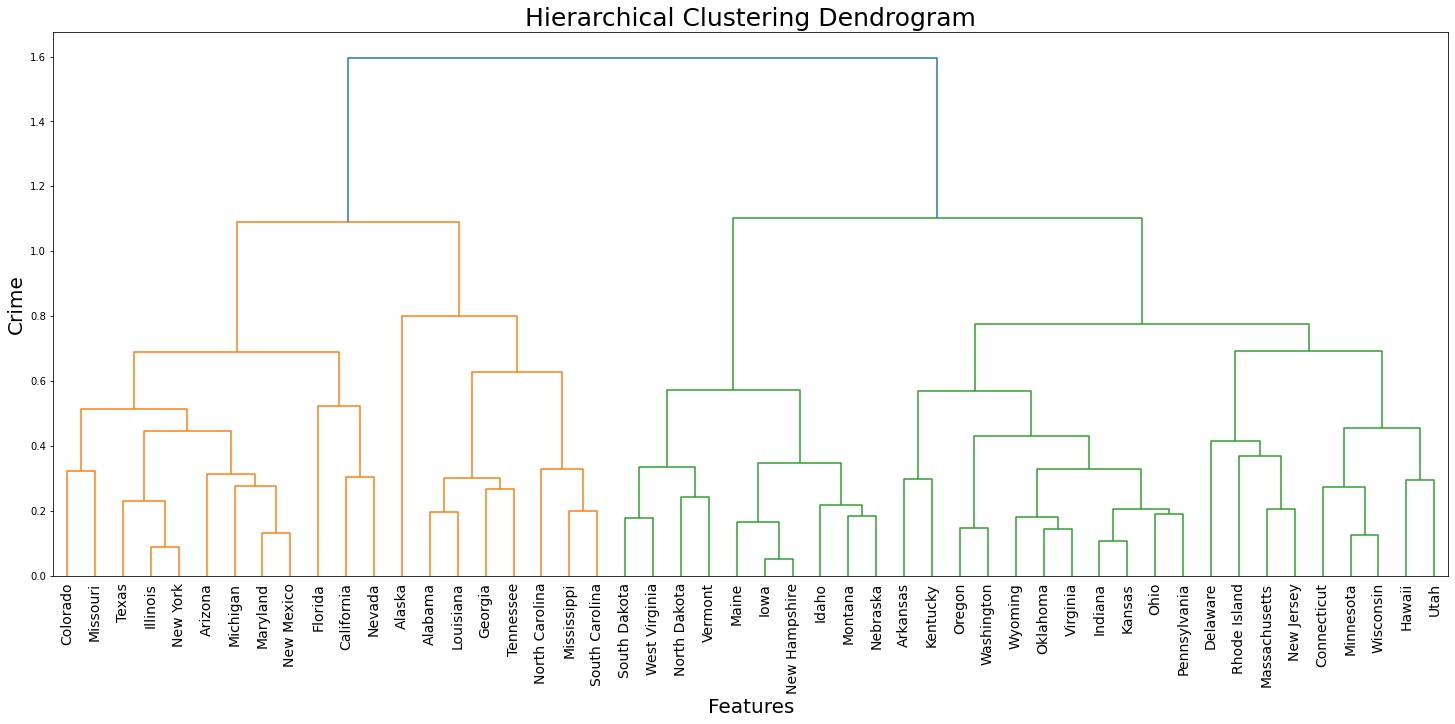

In [11]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram',fontsize=25)
plt.xlabel('Features',fontsize= 20)
plt.ylabel('Crime', fontsize= 20)
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'),orientation='top', labels=data.set_index('state').index , leaf_font_size=14)

In [12]:
from sklearn.metrics import silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.30877213909512063
For n_clusters = 4 The average silhouette_score is : 0.30607294424263076
For n_clusters = 5 The average silhouette_score is : 0.3056360903608855
For n_clusters = 6 The average silhouette_score is : 0.27284356597794224
For n_clusters = 7 The average silhouette_score is : 0.2738764216820654
For n_clusters = 8 The average silhouette_score is : 0.24780604916967516
For n_clusters = 9 The average silhouette_score is : 0.24005511661723847
For n_clusters = 10 The average silhouette_score is : 0.2064391285069323


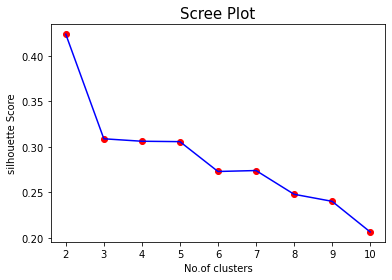

In [13]:
nc=range(2,11)
sc_score=[]    
for i in range(2,11):
    clusterer = AgglomerativeClustering(n_clusters= i , affinity='euclidean', linkage='complete')
    y = clusterer.fit_predict(df_norm)

    silhouette_avg = silhouette_score(df_norm, y)
    sc_score.append(silhouette_score(df_norm,y))
    print("For n_clusters =", i ,
          "The average silhouette_score is :", silhouette_avg)
    
plt.title('Scree Plot',fontsize=15)
plt.xlabel('No.of clusters',fontsize= 10)
plt.ylabel('silhouette Score', fontsize= 10)
plt.plot(nc,sc_score,color="blue")
plt.scatter(nc,sc_score,color="red")
plt.show()

The above plot shows that optimal number of clusters is 3

In [14]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [15]:
hc.fit_predict(df_norm)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

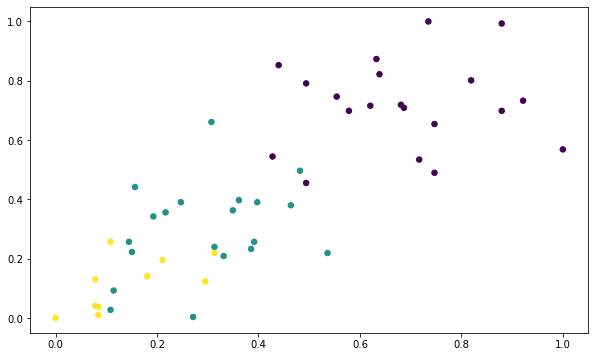

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df_norm.iloc[:,0], df_norm.iloc[:,1],c= hc.fit_predict(df_norm), s = 30, cmap = "viridis")

In [17]:
data['H_clusterid'] = hc.fit_predict(df_norm)

In [18]:
data

,state,Murder,Assault,UrbanPop,Rape,H_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [19]:
data1=data.sort_values('H_clusterid')
data1.iloc[:,[0,-1]]

,state,H_clusterid
0,Alabama,0
42,Texas,0
41,Tennessee,0
39,South Carolina,0
32,North Carolina,0
31,New York,0
30,New Mexico,0
27,Nevada,0
23,Mississippi,0
21,Michigan,0


In [20]:
for i in np.array([0,1,2]):
    print('States that belong to Cluster Index',i)
    print(data[data["H_clusterid"] == i])
    print('\n')

States that belong to Cluster Index 0
             state  Murder  Assault  UrbanPop  Rape  H_clusterid
0          Alabama    13.2      236        58  21.2            0
1           Alaska    10.0      263        48  44.5            0
2          Arizona     8.1      294        80  31.0            0
4       California     9.0      276        91  40.6            0
5         Colorado     7.9      204        78  38.7            0
8          Florida    15.4      335        80  31.9            0
9          Georgia    17.4      211        60  25.8            0
12        Illinois    10.4      249        83  24.0            0
17       Louisiana    15.4      249        66  22.2            0
19        Maryland    11.3      300        67  27.8            0
21        Michigan    12.1      255        74  35.1            0
23     Mississippi    16.1      259        44  17.1            0
24        Missouri     9.0      178        70  28.2            0
27          Nevada    12.2      252        81  46.0 

# K mean

In [21]:
from sklearn.cluster import KMeans

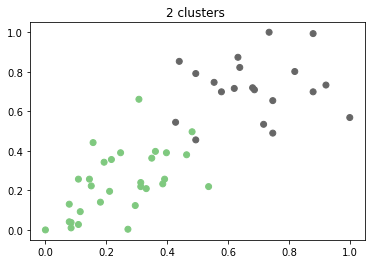

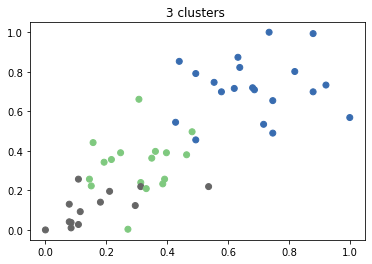

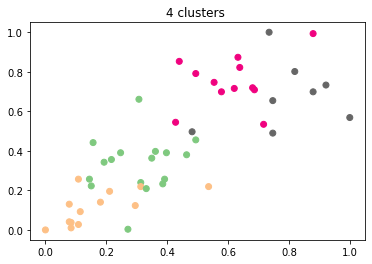

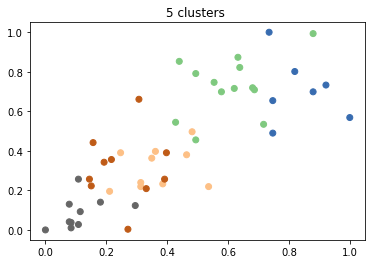

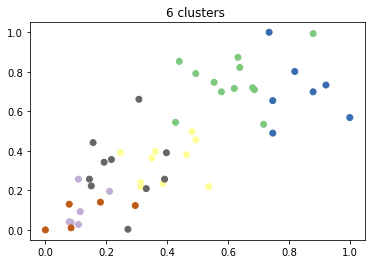

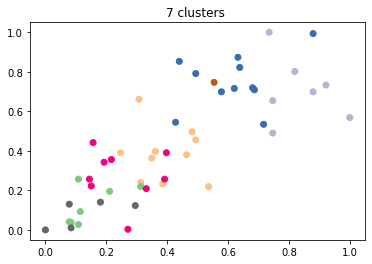

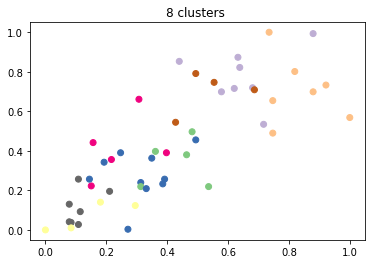

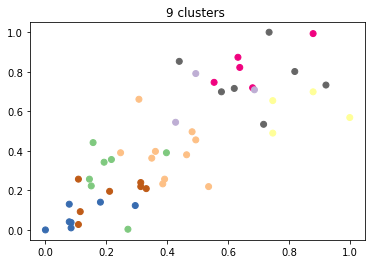

In [22]:
for i in range(2,10):
    model = KMeans(n_clusters=i, max_iter=600, algorithm = 'auto',init="k-means++",)
    model.fit(df_norm)    
    pred=model.predict(df_norm)    
    plt.scatter(df_norm.iloc[:,0], df_norm.iloc[:,1],c=model.labels_,cmap=plt.cm.Accent)
    plt.title(str(i)+ " clusters ")
    plt.show()

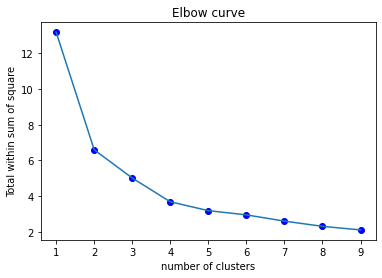

In [23]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.scatter(range(1,10),wcss,color="b")
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('Total within sum of square')
plt.show()

The above Elbow curve shows that Optimal number of clusters is  4

In [24]:
model_kmeans = KMeans(n_clusters=4)
model_kmeans.fit(df_norm)

KMeans(n_clusters=4)

In [25]:
model_kmeans.fit(df_norm).n_clusters

4

In [26]:
model_kmeans.fit(df_norm).cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [27]:
model_kmeans.fit(df_norm).labels_

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3])

### Scatterplot showing clusters and cluster centers

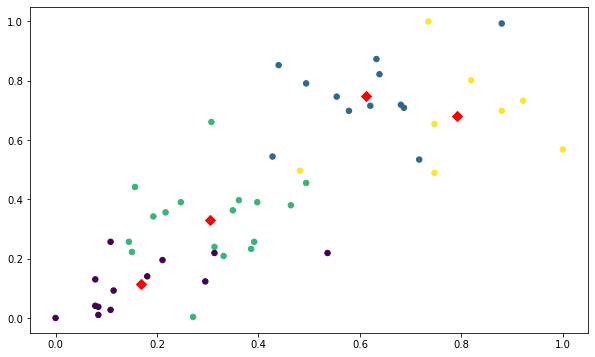

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(df_norm.iloc[:,0], df_norm.iloc[:,1],c= model_kmeans.fit(df_norm).labels_, s = 30, cmap = "viridis")
centers = model_kmeans.fit(df_norm).cluster_centers_                           
plt.scatter(centers[:,0], centers[:,1], c = "red", s = 50, alpha =1,marker="D");

In [29]:
data["K_labels"]=pd.Series(model_kmeans.labels_)
data

,state,Murder,Assault,UrbanPop,Rape,H_clusterid,K_labels
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,0,0
2,Arizona,8.1,294,80,31.0,0,0
3,Arkansas,8.8,190,50,19.5,1,3
4,California,9.0,276,91,40.6,0,0
5,Colorado,7.9,204,78,38.7,0,0
6,Connecticut,3.3,110,77,11.1,1,1
7,Delaware,5.9,238,72,15.8,1,1
8,Florida,15.4,335,80,31.9,0,0
9,Georgia,17.4,211,60,25.8,0,3


In [30]:
data2=data.sort_values('K_labels')
data2.iloc[:,[0,-1]]

,state,K_labels
21,Michigan,0
1,Alaska,0
2,Arizona,0
19,Maryland,0
4,California,0
5,Colorado,0
30,New Mexico,0
8,Florida,0
42,Texas,0
27,Nevada,0


In [31]:
for i in np.array([0,1,2,3]):
    print('States that belong to Cluster Index',i)
    print(data[data["K_labels"] == i].drop(['H_clusterid'],axis=1))
    print('\n')

States that belong to Cluster Index 0
         state  Murder  Assault  UrbanPop  Rape  K_labels
1       Alaska    10.0      263        48  44.5         0
2      Arizona     8.1      294        80  31.0         0
4   California     9.0      276        91  40.6         0
5     Colorado     7.9      204        78  38.7         0
8      Florida    15.4      335        80  31.9         0
12    Illinois    10.4      249        83  24.0         0
19    Maryland    11.3      300        67  27.8         0
21    Michigan    12.1      255        74  35.1         0
27      Nevada    12.2      252        81  46.0         0
30  New Mexico    11.4      285        70  32.1         0
31    New York    11.1      254        86  26.1         0
42       Texas    12.7      201        80  25.5         0


States that belong to Cluster Index 1
            state  Murder  Assault  UrbanPop  Rape  K_labels
6     Connecticut     3.3      110        77  11.1         1
7        Delaware     5.9      238        72  

# DBSCAN

In [32]:
from sklearn.cluster import DBSCAN 
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [33]:
st_data = pd.DataFrame(StandardScaler().fit_transform(data.iloc[:,1:5]), columns= df_norm.columns)
st_data

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


### Hyperparameter Tuning fot epsilon value

In [34]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(st_data)
distances, indices = nbrs.kneighbors(st_data)

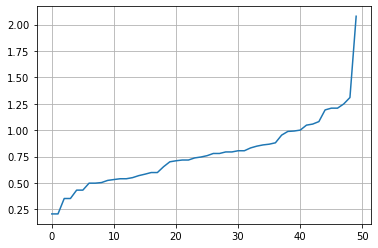

In [35]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()

The optimal value for epsilon will be found at the point of maximum curvature.

We train our model, selecting 1.25 for eps and setting min_samples to 4.

In [36]:
dbs = DBSCAN(eps=1.25, min_samples=4)
dbs.fit(st_data)

DBSCAN(eps=1.25, min_samples=4)

In [37]:
clusters = dbs.labels_
clusters

array([ 0, -1,  1,  1, -1,  1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [38]:
data['DBS_clusterID'] = dbs.labels_

In [39]:
data

,state,Murder,Assault,UrbanPop,Rape,H_clusterid,K_labels,DBS_clusterID
0,Alabama,13.2,236,58,21.2,0,3,0
1,Alaska,10.0,263,48,44.5,0,0,-1
2,Arizona,8.1,294,80,31.0,0,0,1
3,Arkansas,8.8,190,50,19.5,1,3,1
4,California,9.0,276,91,40.6,0,0,-1
5,Colorado,7.9,204,78,38.7,0,0,1
6,Connecticut,3.3,110,77,11.1,1,1,1
7,Delaware,5.9,238,72,15.8,1,1,1
8,Florida,15.4,335,80,31.9,0,0,-1
9,Georgia,17.4,211,60,25.8,0,3,0


In [40]:
for i in np.array([-1,0,1]):
    print('States that belong to Cluster Index',i)
    print(data[data["DBS_clusterID"] == i].drop(['H_clusterid','K_labels'],axis=1))
    print('\n')

States that belong to Cluster Index -1
         state  Murder  Assault  UrbanPop  Rape  DBS_clusterID
1       Alaska    10.0      263        48  44.5             -1
4   California     9.0      276        91  40.6             -1
8      Florida    15.4      335        80  31.9             -1
27      Nevada    12.2      252        81  46.0             -1


States that belong to Cluster Index 0
             state  Murder  Assault  UrbanPop  Rape  DBS_clusterID
0          Alabama    13.2      236        58  21.2              0
9          Georgia    17.4      211        60  25.8              0
17       Louisiana    15.4      249        66  22.2              0
23     Mississippi    16.1      259        44  17.1              0
32  North Carolina    13.0      337        45  16.1              0
39  South Carolina    14.4      279        48  22.5              0
41       Tennessee    13.2      188        59  26.9              0


States that belong to Cluster Index 1
            state  Murder  Ass

In [41]:
# Noisy points of the data
print('State that are in noise')
data[data['DBS_clusterID'] == -1].state

State that are in noise


1         Alaska
4     California
8        Florida
27        Nevada
Name: state, dtype: object